# Project: Analyzing Accommodation Costs in Seattle Using Airbnb Data

## 1. Business Understanding
- Q1 - Price Distribution by Listing: How do listing prices vary across different types of accommodations in Seattle?
- Q2 - Seasonal Price Trends: What are the seasonal variations in accommodation prices in Seattle? When are the prices at their lowest and highest?
- Q3 - Price Influencing Factors: Which features of accommodations (such as beds, cleaning_fee, accommondates) have the most significant impact on the pricing?


# 2. Exploratory Data Analysis

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 2.1 Data Understanding

In [2]:
calendar_df = pd.read_csv("../data/calendar.csv")
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [4]:
listings_df = pd.read_csv("../data/listings.csv")
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [6]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [7]:
reviews_df = pd.read_csv("../data/reviews.csv")
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [8]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


### 2.2 Data Preparation

In [9]:
#@utils

def preprocess_price_column(df):
    """
    Preprocess the 'price' column in the given DataFrame.

    This function converts the 'price' column from object type to float,
    removing any currency symbols and commas in the process.

    Args:
        df (pandas.DataFrame): Input DataFrame containing a 'price' column.

    Returns:
        pandas.DataFrame: DataFrame with the 'price' column converted to float.
    """
    df['price'] = df['price'].astype(str).str.replace(r'[$,\s]', '', regex=True).astype(float)
    return df


def extract_date_features(df):
    """
    Extract date features from the 'date' column in the given DataFrame.

    This function converts the 'date' column to datetime type and adds
    'year' and 'month' columns based on the date information.

    Args:
        df (pandas.DataFrame): Input DataFrame containing a 'date' column.

    Returns:
        pandas.DataFrame: DataFrame with added 'year' and 'month' columns.
    """
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    return df

def clean_price_columns(df):
    """
    Clean and convert numeric columns in the DataFrame.

    Args:
        df (pd.DataFrame): Input DataFrame containing price-related columns.

    Returns:
        pd.DataFrame: DataFrame with cleaned and converted numeric columns.
    """
    # Clean and convert cleaning_fee column
    df['cleaning_fee'] = df['cleaning_fee'].replace('[$]', '', regex=True).astype(float)

    # Clean and convert extra_people column
    df['extra_people'] = df['extra_people'].replace('[$,]', '', regex=True).astype(float)

    # Clean and convert price column
    df['price'] = df['price'].replace('[$,]', '', regex=True).astype(float)

    return df

def fill_missing_with_mean(df):
    """
    Fill missing values in specified columns with their respective means.

    Args:
        df (pd.DataFrame): Input DataFrame containing columns with missing values.

    Returns:
        pd.DataFrame: DataFrame with missing values filled by column means.
    """
    columns_to_fill = ['bathrooms', 'bedrooms', 'beds', 'cleaning_fee']
    
    for column in columns_to_fill:
        df[column] = df[column].fillna(df[column].mean())

    return df

#### Clean dataset

Text(0.5, 1.0, 'Missing values per columns, %')

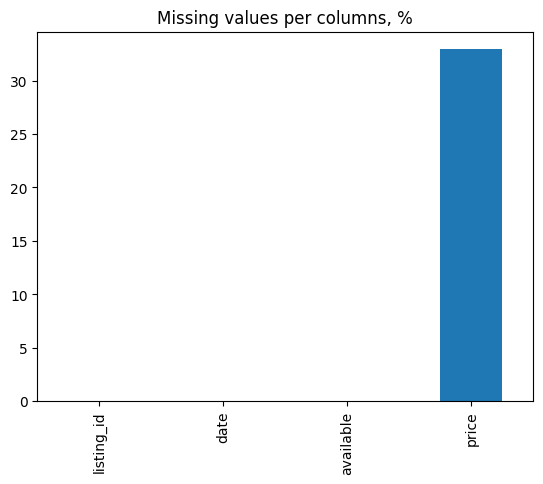

In [10]:
#@calendar dataset

# Calculate the percentage of missing values in each column
missing_percentage = calendar_df.isnull().mean() * 100

# Plot the missing values percentage as a bar chart
missing_percentage.plot(kind="bar")
plt.title("Missing values per columns, %")


In [11]:
# Remove rows with missing 'price' values
calendar_clean_df = calendar_df.dropna(subset=['price'])

# Remove the 'available' column
calendar_clean_df = calendar_clean_df.drop(columns=['available'])
calendar_clean_df

,listing_id,date,price
0,241032,2016-01-04,$85.00
1,241032,2016-01-05,$85.00
9,241032,2016-01-13,$85.00
10,241032,2016-01-14,$85.00
14,241032,2016-01-18,$85.00
...,...,...,...
1393207,10208623,2016-01-06,$87.00
1393208,10208623,2016-01-07,$87.00
1393211,10208623,2016-01-10,$87.00
1393212,10208623,2016-01-11,$87.00


In [12]:
preprocess_price_column(calendar_clean_df)
extract_date_features(calendar_clean_df)

,listing_id,date,price,year,month
0,241032,2016-01-04,85.0,2016,1
1,241032,2016-01-05,85.0,2016,1
9,241032,2016-01-13,85.0,2016,1
10,241032,2016-01-14,85.0,2016,1
14,241032,2016-01-18,85.0,2016,1
...,...,...,...,...,...
1393207,10208623,2016-01-06,87.0,2016,1
1393208,10208623,2016-01-07,87.0,2016,1
1393211,10208623,2016-01-10,87.0,2016,1
1393212,10208623,2016-01-11,87.0,2016,1


In [13]:
calendar_clean_df['year'].value_counts()

year
2016    928844
2017      5698
Name: count, dtype: int64

In [14]:
calendar_clean_df = calendar_clean_df[calendar_clean_df['year']==2016]

2017 accounts for a very small amount in the data, so it will be eliminated. This ensures that the distribution of date data is confined within one year

In [15]:
#@ listings dataset

Selected the relevant columns

In [16]:
RELEVANT_COLUMNS  = ['price', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'property_type', 'accommodates', 'guests_included', 'extra_people']

In [17]:
filtered_listings_df = listings_df[RELEVANT_COLUMNS]
filtered_listings_df

,price,bathrooms,bedrooms,beds,cleaning_fee,property_type,accommodates,guests_included,extra_people
0,$85.00,1.0,1.0,1.0,NaN,Apartment,4,2,$5.00
1,$150.00,1.0,1.0,1.0,$40.00,Apartment,4,1,$0.00
2,$975.00,4.5,5.0,7.0,$300.00,House,11,10,$25.00
3,$100.00,1.0,0.0,2.0,NaN,Apartment,3,1,$0.00
4,$450.00,2.0,3.0,3.0,$125.00,House,6,6,$15.00
...,...,...,...,...,...,...,...,...,...
3813,$359.00,2.0,3.0,3.0,$230.00,House,6,1,$0.00
3814,$79.00,1.0,1.0,2.0,$50.00,Apartment,4,3,$25.00
3815,$93.00,1.0,1.0,1.0,$35.00,House,2,2,$20.00
3816,$99.00,1.0,0.0,1.0,$45.00,Condominium,2,1,$0.00


In [ ]:
clean_price_columns(filtered_listings_df)
fill_missing_with_mean(filtered_listings_df)
filtered_listings_df = filtered_listings_df.dropna(subset=['property_type'])

In [19]:
filtered_listings_df

,price,bathrooms,bedrooms,beds,cleaning_fee,property_type,accommodates,guests_included,extra_people
0,85.0,1.0,1.0,1.0,61.710904,Apartment,4,2,5.0
1,150.0,1.0,1.0,1.0,40.000000,Apartment,4,1,0.0
2,975.0,4.5,5.0,7.0,300.000000,House,11,10,25.0
3,100.0,1.0,0.0,2.0,61.710904,Apartment,3,1,0.0
4,450.0,2.0,3.0,3.0,125.000000,House,6,6,15.0
...,...,...,...,...,...,...,...,...,...
3813,359.0,2.0,3.0,3.0,230.000000,House,6,1,0.0
3814,79.0,1.0,1.0,2.0,50.000000,Apartment,4,3,25.0
3815,93.0,1.0,1.0,1.0,35.000000,House,2,2,20.0
3816,99.0,1.0,0.0,1.0,45.000000,Condominium,2,1,0.0


In [20]:
filtered_listings_df.isnull().sum()

price              0
bathrooms          0
bedrooms           0
beds               0
cleaning_fee       0
property_type      0
accommodates       0
guests_included    0
extra_people       0
dtype: int64

# 3: Evaluate the Results

### Q1 - Price Distribution by Listing: How do listing prices vary across different types of accommodations in Seattle?

In [21]:
# Group by 'property_type' and calculate the average price
average_prices = filtered_listings_df.groupby('property_type')['price'].mean()

# Display the average prices by property type
average_prices

property_type
Apartment          122.932670
Bed & Breakfast    112.054054
Boat               282.375000
Bungalow           115.615385
Cabin              104.666667
Camper/RV          120.461538
Chalet              98.500000
Condominium        151.109890
Dorm                39.500000
House              132.351414
Loft               135.700000
Other               94.681818
Tent                54.000000
Townhouse          129.457627
Treehouse          101.000000
Yurt               100.000000
Name: price, dtype: float64

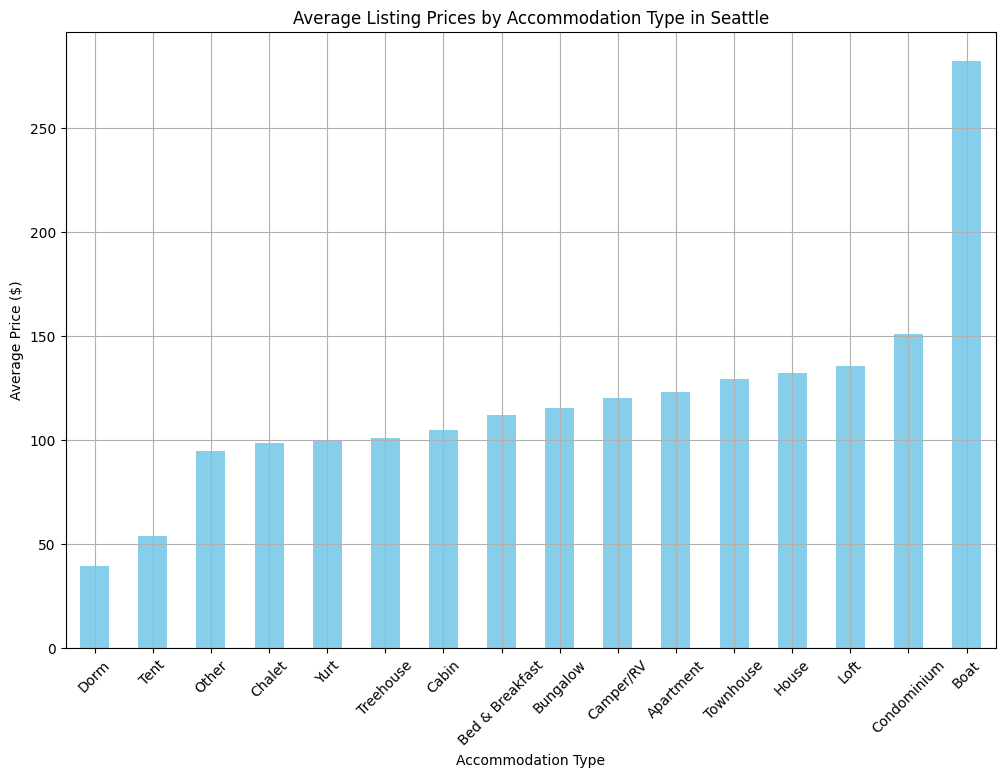

In [22]:
# Plotting the average prices for different types of accommodations
plt.figure(figsize=(12, 8))
average_prices.sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Listing Prices by Accommodation Type in Seattle')
plt.xlabel('Accommodation Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The bar chart highlights that in Seattle, boats are the priciest accommodation type at an average of \$282 per night, indicating their premium and unique offerings. Conversely, dorms and tents are the most budget-friendly, averaging \$40 and \$54 respectively, catering to economical travelers. Other common types like apartments and houses fall within a moderate price range, showing a diverse market suited for a variety of preferences and budgets.

### Q2 - Seasonal Price Trends: What are the seasonal variations in accommodation prices in Seattle? When are the prices at their lowest and highest?

In [24]:
# Calculate the average price per month
monthly_prices = calendar_clean_df.groupby('month')['price'].mean()

# Convert monthly_prices to a DataFrame
monthly_prices_df = monthly_prices.reset_index()
monthly_prices_df.columns = ['month', 'price']

# Display the monthly prices DataFrame
monthly_prices_df.head(3)

,month,price
0,1,121.568409
1,2,124.293927
2,3,128.644488


<Figure size 1000x600 with 0 Axes>

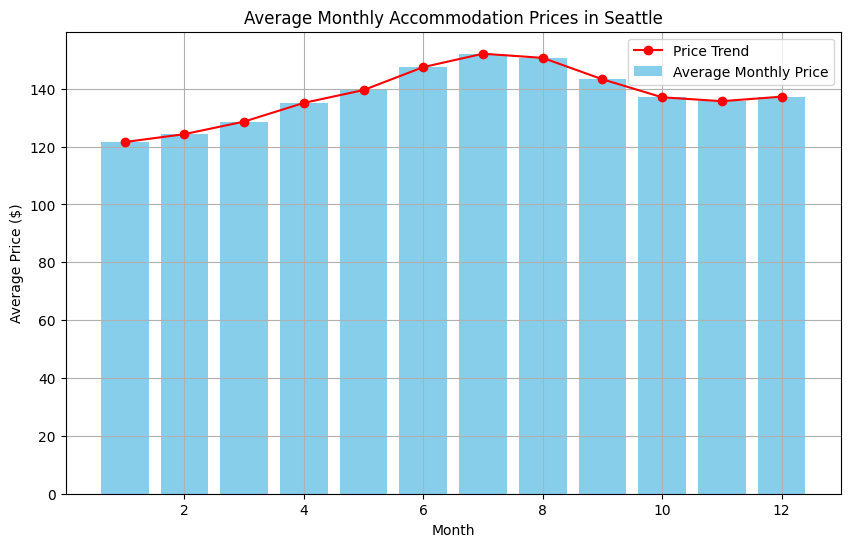

In [25]:
plt.figure(figsize=(10, 6))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(monthly_prices_df['month'], monthly_prices_df['price'], color='skyblue', label='Average Monthly Price')
plt.plot(monthly_prices_df['month'], monthly_prices_df['price'], color='r', marker='o', linestyle='-', label='Price Trend')
plt.title('Average Monthly Accommodation Prices in Seattle')
plt.xlabel('Month')
plt.ylabel('Average Price ($)')
plt.legend()
plt.grid(True)
plt.show()

The plot shows that accommodation prices in Seattle peak in July and are lowest in January. Prices rise steadily from January through July, reflecting increased demand during the summer tourist season, and then gradually decline towards the end of the year.

### - Q3 - Price Influencing Factors: Which features of accommodations (such as beds, cleaning_fee, accommondates) have the most significant impact on the pricing?

In [26]:
#drop string column
filtered_listings_df = filtered_listings_df.drop(columns=['property_type'])

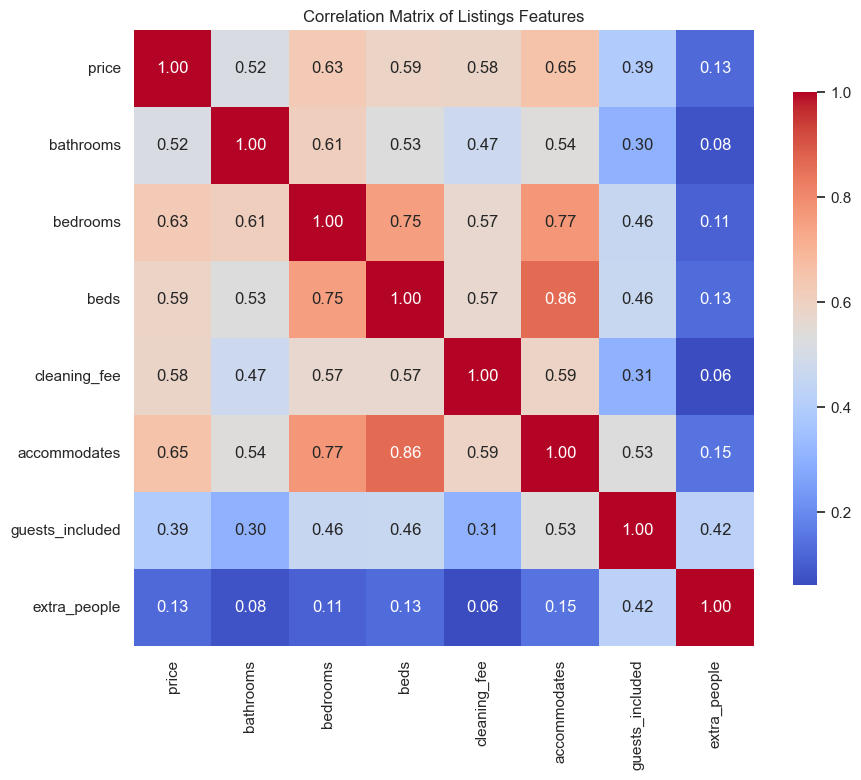

In [27]:
# Set the seaborn style
sns.set(style='white')
correlation_matrix = filtered_listings_df.corr()
# Create the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .8})
plt.title('Correlation Matrix of Listings Features')
plt.show()

The heatmap indicates that the most significant factors influencing accommodation pricing are:

- Bedrooms (0.63 correlation): More bedrooms generally lead to higher prices.
- Accommodates (0.65 correlation): Properties that host more people tend to cost more.
- Cleaning Fee (0.58 correlation): Higher cleaning fees are associated with higher prices.

Size and capacity significantly drive pricing, whereas fees for extra guests have a lesser impact. This suggests focusing on enhancing features like space and amenities to justify higher pricing strategies.